<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-2'

In [ ]:

os.listdir(base_path)

['data_multi_delta_0_n20-2.csv',
 'data_multi_delta_0_n30-2.csv',
 'data_multi_delta_0_n60-2.csv',
 'data_multi_delta_0_n120-2.csv',
 'data_multi_delta_0_n250-2.csv']

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60-2.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.581077,91.642831,72.983431,0.854541,254.061880,253.041848,1.020032
1,0.0,1.0,53.272152,20.568920,91.635594,1.618237,177.094903,175.692244,1.402659
2,0.0,2.0,61.365074,82.468999,25.624836,-0.321764,179.137145,179.261605,-0.124460
3,0.0,3.0,85.560193,50.145713,96.357922,-0.903383,241.160445,242.061288,-0.900844
4,0.0,4.0,92.533655,38.949585,95.099698,-0.445301,236.137637,236.580510,-0.442873
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.873113,83.605985,62.119365,1.360601,233.959064,232.429739,1.529325
59996,999.0,56.0,80.488536,21.242046,53.532452,-0.142728,165.120306,165.271394,-0.151088
59997,999.0,57.0,63.152250,28.319098,50.742294,-0.852306,151.361336,152.219619,-0.858283
59998,999.0,58.0,55.435368,61.877264,53.834585,1.195532,182.342749,181.065188,1.277560


In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.581077,91.642831,72.983431,0.854541,254.061880,253.041848,1.020032
1,0.0,1.0,53.272152,20.568920,91.635594,1.618237,177.094903,175.692244,1.402659
2,0.0,2.0,61.365074,82.468999,25.624836,-0.321764,179.137145,179.261605,-0.124460
3,0.0,3.0,85.560193,50.145713,96.357922,-0.903383,241.160445,242.061288,-0.900844
4,0.0,4.0,92.533655,38.949585,95.099698,-0.445301,236.137637,236.580510,-0.442873
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.873113,83.605985,62.119365,1.360601,233.959064,232.429739,1.529325
59996,999.0,56.0,80.488536,21.242046,53.532452,-0.142728,165.120306,165.271394,-0.151088
59997,999.0,57.0,63.152250,28.319098,50.742294,-0.852306,151.361336,152.219619,-0.858283
59998,999.0,58.0,55.435368,61.877264,53.834585,1.195532,182.342749,181.065188,1.277560


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    78.581077  91.642831  72.983431  ...  254.061880  253.041848  1.020032
      1.0    53.272152  20.568920  91.635594  ...  177.094903  175.692244  1.402659
      2.0    61.365074  82.468999  25.624836  ...  179.137145  179.261605 -0.124460
      3.0    85.560193  50.145713  96.357922  ...  241.160445  242.061288 -0.900844
      4.0    92.533655  38.949585  95.099698  ...  236.137637  236.580510 -0.442873
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   76.873113  83.605985  62.119365  ...  233.959064  232.429739  1.529325
      56.0   80.488536  21.242046  53.532452  ...  165.120306  165.271394 -0.151088
      57.0   63.152250  28.319098  50.742294  ...  151.361336  152.219619 -0.858283
      58.0   55.435368  61.877264  53.834585  ...  182.342749  181.065188  1.277560
      59.0   40.210793  35.617880  85.778043  ...  171.860698  171.417116  0.443582

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    78.581077  91.642831  72.983431  ...  254.061880  253.041848  1.020032
      1.0    53.272152  20.568920  91.635594  ...  177.094903  175.692244  1.402659
      2.0    61.365074  82.468999  25.624836  ...  179.137145  179.261605 -0.124460
      3.0    85.560193  50.145713  96.357922  ...  241.160445  242.061288 -0.900844
      4.0    92.533655  38.949585  95.099698  ...  236.137637  236.580510 -0.442873
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   76.873113  83.605985  62.119365  ...  233.959064  232.429739  1.529325
      56.0   80.488536  21.242046  53.532452  ...  165.120306  165.271394 -0.151088
      57.0   63.152250  28.319098  50.742294  ...  151.361336  152.219619 -0.858283
      58.0   55.435368  61.877264  53.834585  ...  182.342749  181.065188  1.277560
      59.0   40.210793  35.617880  85.778043  ...  171.860698  171.417116  0.443582

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.581077,91.642831,72.983431,0.854541,254.061880,253.041848,1.020032
1,0.0,1.0,53.272152,20.568920,91.635594,1.618237,177.094903,175.692244,1.402659
2,0.0,2.0,61.365074,82.468999,25.624836,-0.321764,179.137145,179.261605,-0.124460
3,0.0,3.0,85.560193,50.145713,96.357922,-0.903383,241.160445,242.061288,-0.900844
4,0.0,4.0,92.533655,38.949585,95.099698,-0.445301,236.137637,236.580510,-0.442873
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.873113,83.605985,62.119365,1.360601,233.959064,232.429739,1.529325
59996,999.0,56.0,80.488536,21.242046,53.532452,-0.142728,165.120306,165.271394,-0.151088
59997,999.0,57.0,63.152250,28.319098,50.742294,-0.852306,151.361336,152.219619,-0.858283
59998,999.0,58.0,55.435368,61.877264,53.834585,1.195532,182.342749,181.065188,1.277560


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    78.581077  91.642831  72.983431  ...  254.061880  253.041848  1.020032
      1.0    53.272152  20.568920  91.635594  ...  177.094903  175.692244  1.402659
      2.0    61.365074  82.468999  25.624836  ...  179.137145  179.261605 -0.124460
      3.0    85.560193  50.145713  96.357922  ...  241.160445  242.061288 -0.900844
      4.0    92.533655  38.949585  95.099698  ...  236.137637  236.580510 -0.442873
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   76.873113  83.605985  62.119365  ...  233.959064  232.429739  1.529325
      56.0   80.488536  21.242046  53.532452  ...  165.120306  165.271394 -0.151088
      57.0   63.152250  28.319098  50.742294  ...  151.361336  152.219619 -0.858283
      58.0   55.435368  61.877264  53.834585  ...  182.342749  181.065188  1.277560
      59.0   40.210793  35.617880  85.778043  ...  171.860698  171.417116  0.443582

[60000 rows x 7 columns]

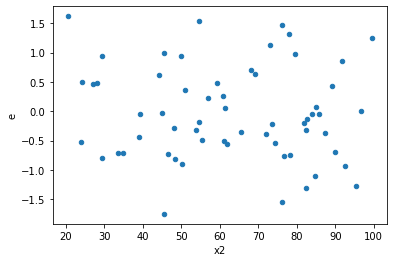

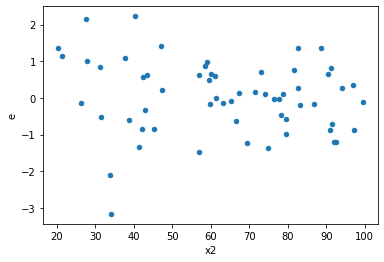

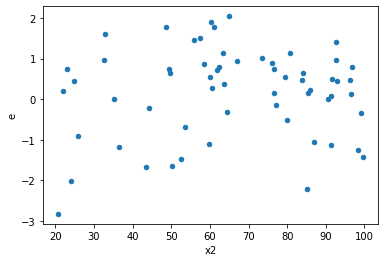

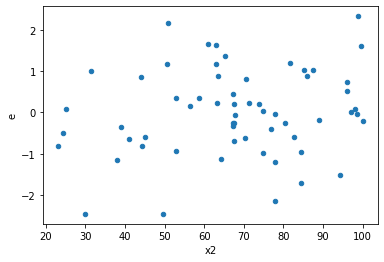

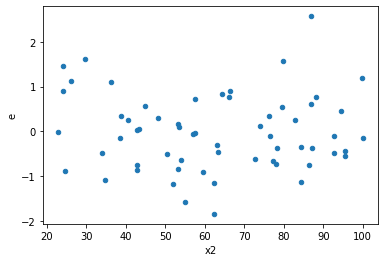

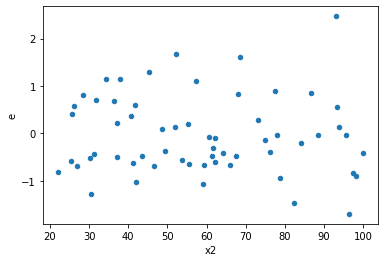

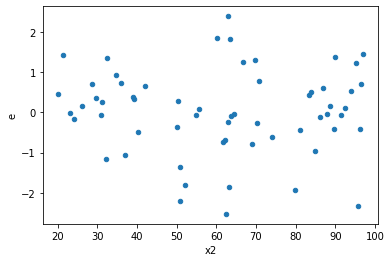

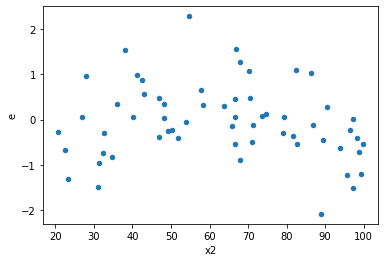

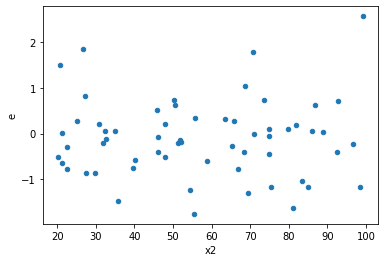

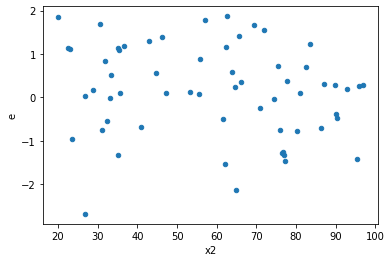

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,14.78683015043264,16.292501955528074,0.704134769068221,0.7758334264537178,1.1018251910502521,0.8262520568782132,0.5868739715608934,0.4131260284391066,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,8.945701813002492,16.053535246578885,0.42598580061916624,0.7644540593608993,1.794552912913465,0.18855964946050552,0.9057201752697472,0.09427982473025276,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,12.174350191249593,19.203499065650725,0.5797309614880758,0.9144523364595584,1.5773736391658415,0.3041540016503803,0.8479229991748098,0.15207700082519016,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,14.259923224044147,17.008657871745207,0.6790439630497213,0.8099360891307241,1.1927594282601974,0.6900026326678919,0.6549986836660541,0.34500131633394593,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,8.999564502973618,9.782635422502826,0.42855069061779133,0.4658397820239441,1.0870120903373122,0.8501869655442453,0.5749065172278773,0.42509348277212267,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,12.360195808185921,22.52635955090499,0.5885807527707582,1.0726837881383329,1.8224921271867078,0.17730574623790707,0.9113471268810465,0.08865287311895353,Reject001=1 : Homoscedasticity
10.0,21.0,21.0,10.968316266756094,31.84721322231827,0.5223007746074331,1.5165339629675367,2.9035644530823834,0.018255881720577127,0.9908720591397114,0.009127940860288564,Reject001=1 : Homoscedasticity
11.0,21.0,21.0,22.83044905953868,23.013382445063456,1.0871642409304134,1.0958753545268312,1.0080126932697515,0.9855831077906654,0.5072084461046673,0.4927915538953327,Reject001=1 : Homoscedasticity
12.0,21.0,21.0,13.261548335553826,18.699684925202842,0.6315023016930393,0.890461186914421,1.4100679990035196,0.43764236169835113,0.7811788191508244,0.21882118084917557,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,14.78683015043264,16.292501955528074,0.704134769068221,0.7758334264537178,1.1018251910502521,0.8262520568782132,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,39.981845467013585,13.544581244305295,1.903897403191123,0.6449800592526331,0.33876828560802796,0.016604835013274876,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,28.517084186171626,17.346515558087518,1.3579563898176965,0.8260245503851199,0.6082850352035328,0.2627540018249144,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,22.562028832630325,20.882443850997504,1.0743823253633489,0.9944020881427382,0.9255570057953421,0.8609738843598111,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,8.945701813002492,16.053535246578885,0.42598580061916624,0.7644540593608993,1.794552912913465,0.18855964946050552,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,12.174350191249593,19.203499065650725,0.5797309614880758,0.9144523364595584,1.5773736391658415,0.3041540016503803,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,14.259923224044147,17.008657871745207,0.6790439630497213,0.8099360891307241,1.1927594282601974,0.6900026326678919,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,8.999564502973618,9.782635422502826,0.42855069061779133,0.4658397820239441,1.0870120903373122,0.8501869655442453,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,12.360195808185921,22.52635955090499,0.5885807527707582,1.0726837881383329,1.8224921271867078,0.17730574623790707,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      988
Reject001=0 : Heteroscedasticity     12
Name: Result_test, dtype: int64